# Writing the Linear Regression algorithm from scratch on same dataset as of LR-Dummy, where we used all sklearn functions, now we are building all of them from scratch

In [170]:
import numpy as np

In [171]:
data=np.loadtxt('data.csv',delimiter=",")

In [172]:
x=data[:,0]
y=data[:,1]
print(x.shape)

print(y.shape)
print(type(x),type(y))

(100,)
(100,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [173]:
#We would be doing the code of LR for 1-dimension features
from sklearn import model_selection
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.25)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(75,)
(25,)
(75,)
(25,)


# (1) Now we are going to make a fit function, which will take the training data and specefies the value of m and c

In [174]:
#The formula for deriving the m and c is written in copy
def fitFunction(x_train,y_train):
#For loop is not required to multiply all the items of one array to another respective index
#As in numpy Array bydefault respective index of both array are operated like here is product:
#.mean() function used for getting means, summation leads to very big Entity, so we goes for average, summation/total=mean
    num=(x_train*y_train).mean()-x_train.mean()*y_train.mean()
    deno=((x_train)**2).mean() - x_train.mean()**2
    M=num/deno
    C=y_train.mean() - M*x.mean()
    
    return M,C


In [175]:
#Now will call the fit function to get the values of m and c
m,c=fitFunction(x_train,y_train)
print(m,c)

1.391182661351903 4.18617299127402


In [176]:
from sklearn.linear_model import LinearRegression # Along with using inBuilt function to cross-check also
alg1=LinearRegression()
X_train=x_train.reshape(-1,1)
alg1.fit(X_train,y_train)#Now algo-fits the trainng data as now X-data is 2D means it has 
#rows and column
#Now as the algo is trained from the training data, now it has figured out the bestFit-Line

LinearRegression()

In [177]:
#As we have only one feature,means lineEquation would be y=mx+c :
print(alg1.coef_)#By-default all-coeff are passed in a single array
#m, as here is only one feature so only oneCoeff is there, that's why here is an array with one item ,
print(alg1.intercept_) #c

[1.39118266]
4.4638747865065085


# (2) Now we are going to make a predict-function which will predict o/p as y_pred from x_test , m and c

In [178]:
def predictFunction(m,c,x):
    y_pred=m*x+c #x is a numpy-array, which will multiply-m and add-c with each of its element 
    return y_pred

In [179]:
# Lets get our predictted output as y_pred from testing-data
y_pred_test=predictFunction(m,c,x_test)
y_pred_test.shape

(25,)

In [180]:
# Lets get our predictted output as y_pred from traing-data
y_pred_train=predictFunction(m,c,x_train)
y_pred_train.shape

(75,)

# (3) Now we are going to make Coefficient of Determination {CoD} for getting the score of the model, that efficient it is

In [181]:
def CoD(y_pred,y_truth):
    num=(y_truth-y_pred)**2 #Here also Y are NumpyArray, which will do operation element-wise 
    u=np.sum(num) #Will get the summation of all the items in the array
    deno=(y_truth-y_truth.mean())**2
    v=np.sum(deno)
    return (1-u/v)

In [182]:
# now we will get our score of testing data from our trained model
score=CoD(y_pred_test,y_test)
print(score)

0.5664325066162068


In [183]:
# now we will get our score of training data from our trained model
score=CoD(y_pred_train,y_train)
print(score)

0.60267384742693


In [184]:
#As the alg1 is already trained by the training data,now by passing x,y in score
#score() would calculate y-pred from alg1 and compare with y_test thorugh CoD and based upon that generated the score
X_test=x_test.reshape(-1,1)
score_test=alg1.score(X_test,y_test)
score_train=alg1.score(X_train,y_train)
print(score_test)
print(score_train)

0.56843347036973
0.6029370272029729


# (4) Now we will calculate our Cost-function

In [185]:
#Cost function
def Cost1(y_pred,y_true):
    ans=(y_true-y_pred)**2
    Cost=ans.mean() # We want avg error per training data
    return Cost

In [187]:
# Getting our value of Cost-function
Cost_test=Cost1(y_pred_test,y_test)
Cost_test

94.29843096914031

In [188]:
# Getting our value of Cost-function from training data
Cost_train=Cost1(y_pred_train,y_train)
Cost_train

116.42654598085686

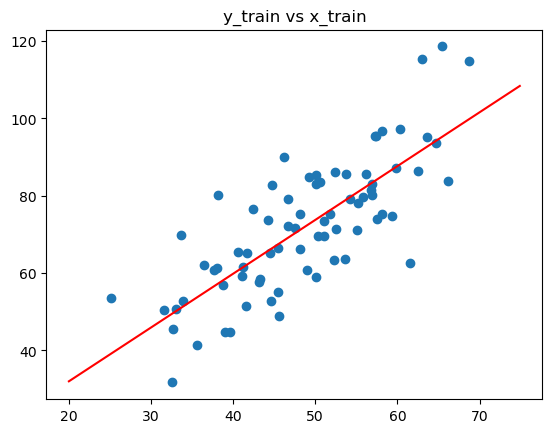

In [189]:
#Lets analysis with the graph along with BestFitLine with training data
import matplotlib.pyplot as plt

#Getting the bestFit-lone
x_line=np.arange(20,75,0.1)#Arranged x-inputs
y_line=m*x_line+c #Got values of Y corresponding to above x-inputs w.r.t the lineEquation
plt.plot(x_line,y_line,'r')

#Getting X_train and Y_train points, so that we could compare how bestFit line is Good
plt.scatter(x_train,y_train)

plt.title("y_train vs x_train")

plt.show()


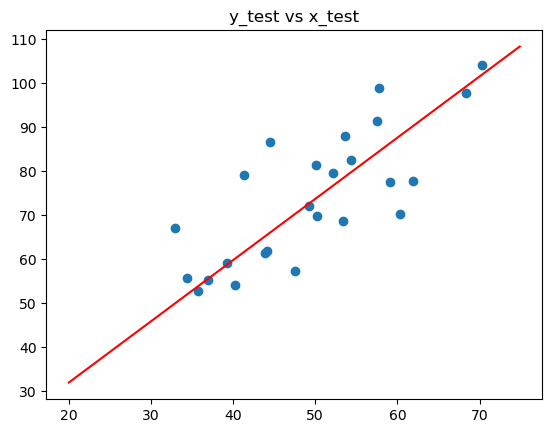

In [190]:
#Lets analysis with the graph along with BestFitLine with Testing-data
import matplotlib.pyplot as plt

#Getting the bestFit-lone
x_line=np.arange(20,75,0.1)#Arranged x-inputs
y_line=m*x_line+c #Got values of Y corresponding to above x-inputs w.r.t the lineEquation
plt.plot(x_line,y_line,'r')

#Getting X_test and Y_test points, so that we could compare how bestFit line is Good
plt.scatter(x_test,y_test)

plt.title("y_test vs x_test")

plt.show()
